/var/folders/rj/0s_44ktn2sn9n3c_r3tyzgch0000gn/T/ipykernel_29266/573778176.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(history_x[i], history_y[i])


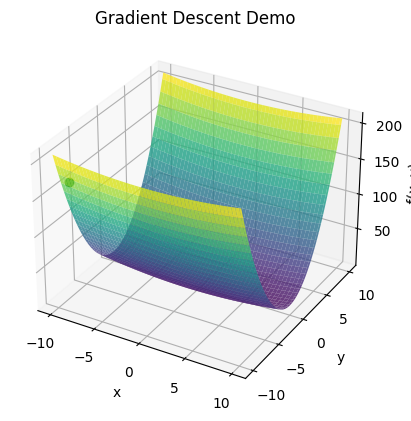

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Function to minimize
def f(x, y):
    return 0.1 * x ** 2 + 2 * y ** 2

# Partial derivatives of the function
def df_dx(x, y):
    return 0.2*x 

def df_dy(x, y):
    return 4*y 

# Gradient Descent function
def gradient_descent(x0, y0, learning_rate, iterations):
    x = x0
    y = y0
    history_x = [x]
    history_y = [y]
    for _ in range(iterations):
        gradient_x = df_dx(x, y)
        gradient_y = df_dy(x, y)
        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y
        history_x.append(x)
        history_y.append(y)
    return history_x, history_y

# Animation function
def animate(i):
    line.set_data(history_x[:i], history_y[:i])
    line.set_3d_properties([f(x, y) for x, y in zip(history_x[:i], history_y[:i])])
    point.set_data(history_x[i], history_y[i])
    point.set_3d_properties(f(history_x[i], history_y[i]))
    return line, point

# Setup
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
z_vals = f(x_mesh, y_mesh)
x0 = -9  # Initial guess for x
y0 = -9  # Initial guess for y
learning_rate = 0.2
iterations = 50
history_x = []
history_y = []

# Perform Gradient Descent
history_x, history_y = gradient_descent(x0, y0, learning_rate, iterations)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_vals, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent Demo')

# Animation
line, = ax.plot(history_x, history_y, [f(x, y) for x, y in zip(history_x, history_y)], color='r')
point, = ax.plot([history_x[0]], [history_y[0]], [f(history_x[0], history_y[0])], 'go')
ani = FuncAnimation(fig, animate, frames=len(history_x), interval=100, blit=True)

plt.show()

In [5]:
ax.view_init(elev=90, azim=-90)


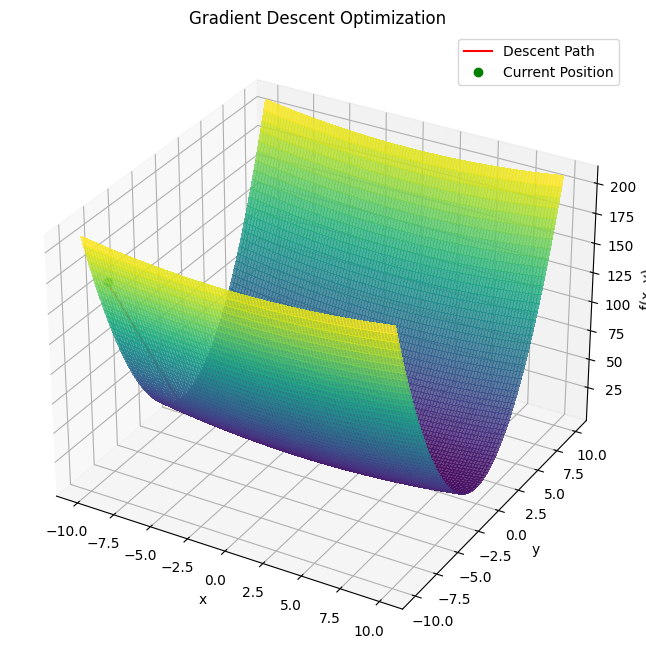

Animation saved as gradient_descent.mp4


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    """
    Objective function: f(x, y) = 0.1 * x^2 + 2 * y^2.
    """
    return 0.1 * x ** 2 + 2 * y ** 2

def df_dx(x, y):
    """
    Partial derivative of f with respect to x.
    """
    return 0.2 * x

def df_dy(x, y):
    """
    Partial derivative of f with respect to y.
    """
    return 4 * y

def gradient_descent(x0, y0, learning_rate, iterations):
    """
    Performs gradient descent optimization.
    
    Parameters:
        x0 (float): Initial x value.
        y0 (float): Initial y value.
        learning_rate (float): Step size for each iteration.
        iterations (int): Number of iterations.
    
    Returns:
        history_x (list of float): List of x values over iterations.
        history_y (list of float): List of y values over iterations.
    """
    x, y = x0, y0
    history_x = [x]
    history_y = [y]
    for _ in range(iterations):
        gradient_x = df_dx(x, y)
        gradient_y = df_dy(x, y)
        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y
        history_x.append(x)
        history_y.append(y)
    return history_x, history_y

def main():
    # Create a meshgrid for the surface plot.
    x_vals = np.linspace(-10, 10, 100)
    y_vals = np.linspace(-10, 10, 100)
    x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
    z_vals = f(x_mesh, y_mesh)
    
    # Set gradient descent parameters.
    x0, y0 = -9, -9  # Initial guess
    learning_rate = 0.2
    iterations = 50
    history_x, history_y = gradient_descent(x0, y0, learning_rate, iterations)
    path_z = [f(x, y) for x, y in zip(history_x, history_y)]
    
    # Create the figure and 3D axes.
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface.
    surf = ax.plot_surface(x_mesh, y_mesh, z_vals, cmap='viridis', alpha=0.8,
                           rstride=1, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Gradient Descent Optimization')
    
    # Plot the initial descent path and starting point.
    line, = ax.plot(history_x, history_y, path_z, color='r', label='Descent Path')
    point, = ax.plot([history_x[0]], [history_y[0]], [path_z[0]], 'go', label='Current Position')
    
    def animate(i):
        """
        Updates the descent path and current point for the animation.
        """
        # Update the descent path up to iteration i.
        current_path_z = [f(x, y) for x, y in zip(history_x[:i+1], history_y[:i+1])]
        line.set_data(history_x[:i+1], history_y[:i+1])
        line.set_3d_properties(current_path_z)
        
        # Update the current point (note the use of lists to pass sequences).
        point.set_data([history_x[i]], [history_y[i]])
        point.set_3d_properties([f(history_x[i], history_y[i])])
        return line, point

    # Create the animation without blitting for compatibility with 3D plots.
    anim = FuncAnimation(fig, animate, frames=len(history_x), interval=100, repeat=False)
    
    plt.legend()
    plt.show()

    # Uncomment the following lines if you want to save the animation.
    # Ensure you have ffmpeg installed and accessible in your PATH.
    #
    anim.save('gradient_descent.mp4', writer='ffmpeg', fps=10)
    print("Animation saved as gradient_descent.mp4")

if __name__ == '__main__':
    main() 


/var/folders/rj/0s_44ktn2sn9n3c_r3tyzgch0000gn/T/ipykernel_29266/2032245189.py:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(history_x[i], history_y[i])


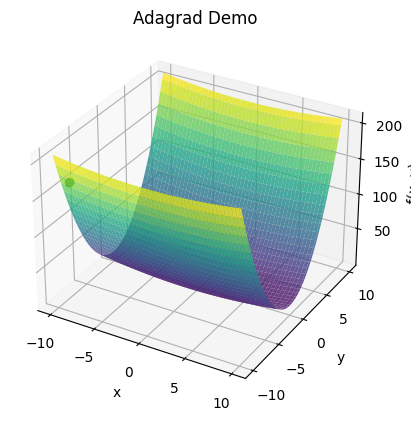

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Function to minimize
def f(x, y):
    return 0.1 * x ** 2 + 2 * y ** 2

# Partial derivatives of the function
def df_dx(x, y):
    return 0.2*x 

def df_dy(x, y):
    return 4*y 

# Adagrad  function
def adagrad(x0, y0, learning_rate, iterations):
    eps = 1e-6
    x = x0
    y = y0
    history_x = [x]
    history_y = [y]
    sx = 0
    sy = 0
    for _ in range(iterations):
        gradient_x = df_dx(x, y)
        gradient_y = df_dy(x, y)
        sx += gradient_x ** 2
        sy += gradient_y ** 2
        x -= learning_rate * gradient_x/math.sqrt(sx + eps)
        y -= learning_rate * gradient_y/ math.sqrt(sy + eps)
        history_x.append(x)
        history_y.append(y)
    return history_x, history_y

# Animation function
def animate(i):
    line.set_data(history_x[:i], history_y[:i])
    line.set_3d_properties([f(x, y) for x, y in zip(history_x[:i], history_y[:i])])
    point.set_data(history_x[i], history_y[i])
    point.set_3d_properties(f(history_x[i], history_y[i]))
    return line, point

# Setup
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
z_vals = f(x_mesh, y_mesh)
x0 = -9  # Initial guess for x
y0 = -9  # Initial guess for y
learning_rate = 1
iterations = 50

history_x = []
history_y = []

# Perform Adagrad
history_x, history_y = adagrad(x0, y0, learning_rate, iterations)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_vals, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Adagrad Demo')

# Animation
line, = ax.plot(history_x, history_y, [f(x, y) for x, y in zip(history_x, history_y)], color='r')
point, = ax.plot([history_x[0]], [history_y[0]], [f(history_x[0], history_y[0])], 'go')
ani = FuncAnimation(fig, animate, frames=len(history_x), interval=100, blit=True)

plt.show()

/var/folders/rj/0s_44ktn2sn9n3c_r3tyzgch0000gn/T/ipykernel_27032/2098235471.py:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(history_x[i], history_y[i])


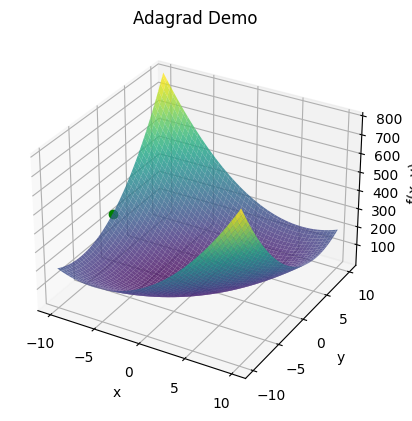

In [3]:

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Function to minimize
def f(x, y):
    return 0.5 * (x + y)** 2 + 2 * (x - y) ** 2

# Partial derivatives of the function
def df_dx(x, y):
    return (x + y) + 4*(x-y)

def df_dy(x, y):
    return (x+y) - 4*(x-y)

# Adagrad  function
def adagrad(x0, y0, learning_rate, iterations):
    eps = 1e-6
    x = x0
    y = y0
    history_x = [x]
    history_y = [y]
    sx = 0
    sy = 0
    for _ in range(iterations):
        gradient_x = df_dx(x, y)
        gradient_y = df_dy(x, y)
        sx += gradient_x ** 2
        sy += gradient_y ** 2
        x -= learning_rate * gradient_x/math.sqrt(sx + eps)
        y -= learning_rate * gradient_y/ math.sqrt(sy + eps)
        history_x.append(x)
        history_y.append(y)
    return history_x, history_y

# Animation function
def animate(i):
    line.set_data(history_x[:i], history_y[:i])
    line.set_3d_properties([f(x, y) for x, y in zip(history_x[:i], history_y[:i])])
    point.set_data(history_x[i], history_y[i])
    point.set_3d_properties(f(history_x[i], history_y[i]))
    return line, point

# Setup
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
z_vals = f(x_mesh, y_mesh)
x0 = -10  # Initial guess for x
y0 = 0  # Initial guess for y
learning_rate = 1
iterations = 50

history_x = []
history_y = []

# Perform Adagrad
history_x, history_y = adagrad(x0, y0, learning_rate, iterations)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_vals, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Adagrad Demo')

# Animation
line, = ax.plot(history_x, history_y, [f(x, y) for x, y in zip(history_x, history_y)], color='r')
point, = ax.plot([history_x[0]], [history_y[0]], [f(history_x[0], history_y[0])], 'go')
ani = FuncAnimation(fig, animate, frames=len(history_x), interval=100, blit=True)

plt.show()

/var/folders/rj/0s_44ktn2sn9n3c_r3tyzgch0000gn/T/ipykernel_27032/677899699.py:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(history_x[i], history_y[i])


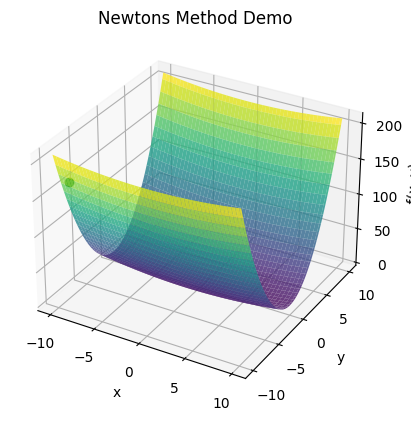

In [4]:

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return 0.1 * x ** 2 + 2 * y ** 2

# Partial derivatives of the function
def df_dx(x, y):
    return 0.2*x 


def df_dy(x, y):
    return 4*y



# Newton's Method  function


def newton(x0, y0, learning_rate, iterations):
    eps = 1e-6
    x = x0
    y = y0
    history_x = [x]
    history_y = [y]
    for _ in range(iterations):
        gradient_x = df_dx(x, y)
        gradient_y = df_dy(x, y)
        x -= gradient_x/0.2
        y -= gradient_y/4
        history_x.append(x)
        history_y.append(y)
    return history_x, history_y

# Animation function
def animate(i):
    line.set_data(history_x[:i], history_y[:i])
    line.set_3d_properties([f(x, y) for x, y in zip(history_x[:i], history_y[:i])])
    point.set_data(history_x[i], history_y[i])
    point.set_3d_properties(f(history_x[i], history_y[i]))
    return line, point

# Setup
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
z_vals = f(x_mesh, y_mesh)
x0 = -9  # Initial guess for x
y0 = -9 # Initial guess for y
learning_rate = 1
iterations = 50

history_x = []
history_y = []

# Perform Adagrad
history_x, history_y = newton(x0, y0, learning_rate, iterations)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_vals, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Newtons Method Demo')

# Animation
line, = ax.plot(history_x, history_y, [f(x, y) for x, y in zip(history_x, history_y)], color='r')
point, = ax.plot([history_x[0]], [history_y[0]], [f(history_x[0], history_y[0])], 'go')
ani = FuncAnimation(fig, animate, frames=len(history_x), interval=100, blit=True)

plt.show()